<a href="https://colab.research.google.com/github/Harrisous/AIPI590_XAI_A2/blob/main/XAI_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #02
### Haochen Li

# 1. Task 1 Exploratory Data Analysis
Exploratory Data Analysis to check Assumptions: Perform an exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met.

Load Data and Transform

In [1]:
import kagglehub
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [2]:
import pandas as pd
import os
df = pd.read_csv(os.path.join(path,"WA_Fn-UseC_-Telco-Customer-Churn.csv"))
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
mask = pd.to_numeric(df['TotalCharges'], errors='coerce').isna()
print(df.loc[mask, 'TotalCharges'])

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


In [5]:
# df.drop(columns=['customerID'], inplace=True)
df['gender'] = df['gender'].map({'Female': False, 'Male': True})
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: False, 1: True})
df['Partner'] = df['Partner'].map({'No': False, 'Yes': True})
df['Dependents'] = df['Dependents'].map({'No': False, 'Yes': True})
df['PhoneService'] = df['PhoneService'].map({'No': False, 'Yes': True})
df = pd.get_dummies(df, columns=['MultipleLines'], prefix='MultipleLines')
df = pd.get_dummies(df, columns=['InternetService'], prefix='InternetService')
df = pd.get_dummies(df, columns=['OnlineSecurity'], prefix='OnlineSecurity')
df = pd.get_dummies(df, columns=['OnlineBackup'], prefix='OnlineBackup')
df = pd.get_dummies(df, columns=['DeviceProtection'], prefix='DeviceProtection')
df = pd.get_dummies(df, columns=['TechSupport'], prefix='TechSupport')
df = pd.get_dummies(df, columns=['StreamingTV'], prefix='StreamingTV')
df = pd.get_dummies(df, columns=['StreamingMovies'], prefix='StreamingMovies')
df = pd.get_dummies(df, columns=['Contract'], prefix='Contract')
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': False, 'Yes': True})
df = pd.get_dummies(df, columns=['PaymentMethod'], prefix='PaymentMethod')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df['Churn'] = df['Churn'].map({'No': False, 'Yes': True})
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   bool   
 2   SeniorCitizen                            7043 non-null   bool   
 3   Partner                                  7043 non-null   bool   
 4   Dependents                               7043 non-null   bool   
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   bool   
 7   PaperlessBilling                         7043 non-null   bool   
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7032 non-null   float64
 10  Churn                                    7043 no

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,False,False,True,False,1,False,True,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,True,False,False,False,34,True,False,56.95,1889.50,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,True,False,False,False,2,True,True,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,True,False,False,False,45,False,False,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,False,False,False,False,2,True,True,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


 Data: TotalCharges contains 11 null data. Action: delete these rows.

In [6]:
df.dropna(inplace=True)

## test1. Linearity

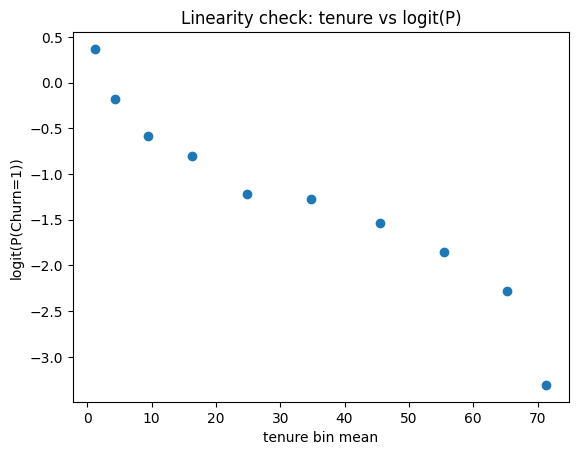

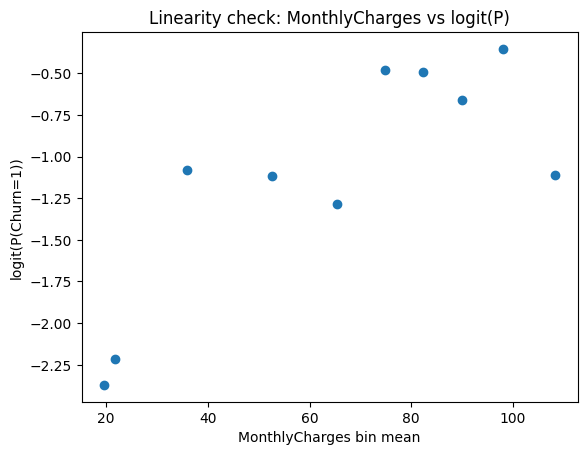

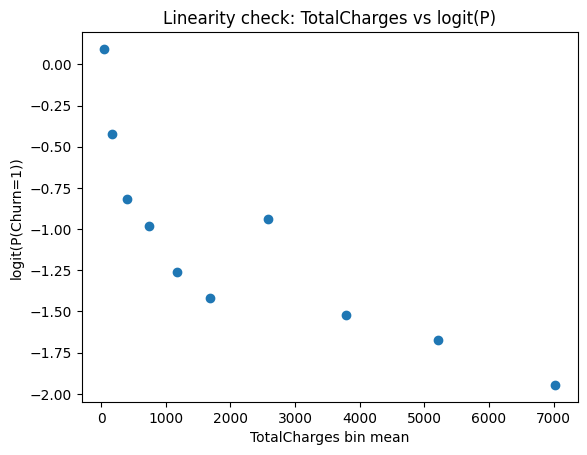

In [7]:
# scatter plots of each predictor versus the response variable (logit p)
# below code generated by Perplexity 9/10/2025 7:15 pm
import numpy as np
import matplotlib.pyplot as plt

features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in features:
  temp = df[[feature, 'Churn']].copy()
  temp['bin'] = pd.qcut(temp[feature], q=10, duplicates='drop')
  prob = temp.groupby('bin', dropna=False,observed=False)['Churn'].mean()
  mean_x = temp.groupby('bin', dropna=False,observed=False)[feature].mean()
  epsilon = 1e-6
  prob = np.clip(prob, epsilon, 1 - epsilon)
  logit_prob = np.log(prob / (1 - prob))

  plt.scatter(mean_x, logit_prob)
  plt.xlabel(f'{feature} bin mean')
  plt.ylabel('logit(P(Churn=1))')
  plt.title(f'Linearity check: {feature} vs logit(P)')
  plt.show()

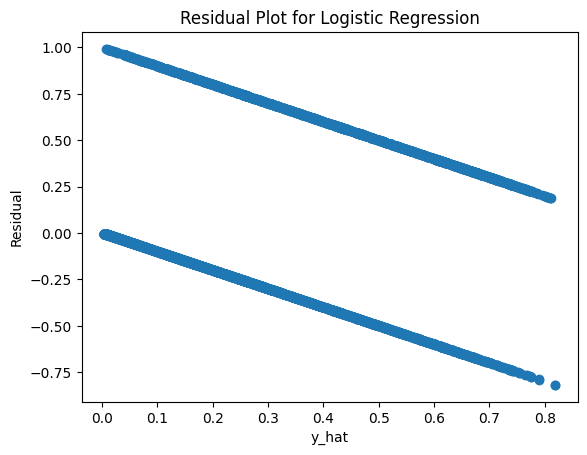

In [8]:
# residual analysis
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# remove some missing value in TotalCharges
df_clean = df[features + ['Churn']].dropna()
X = df_clean[features].values
y = df_clean['Churn'].values

model = LogisticRegression()
model.fit(X, y)

pred_prob = model.predict_proba(X)[:, 1]
residual = y - pred_prob

plt.scatter(pred_prob, residual)
plt.xlabel('y_hat')
plt.ylabel('Residual')
plt.title('Residual Plot for Logistic Regression')
plt.show()

### Linearity Summary:
1. From scatter plot of continuous features against logit of result, strong linearity is observed for tenure, and weaker linearity is observed for Monthly Charges and TotalCharges.  

2. From residual plot, residual is linear[link text](https://) so the linearity assumption is established.

## test2. Independence of Observations
Since no time series data are involved, the only check for independence of observation is to check there is no duplicate user. i.e. check customerID

In [9]:
df.duplicated(subset=['customerID']).sum()

np.int64(0)

### Independence of observation test result
The sample does not include time series nor the data from the same customer, the observations can be viewed as independent.

## test3. Homoscedasticity

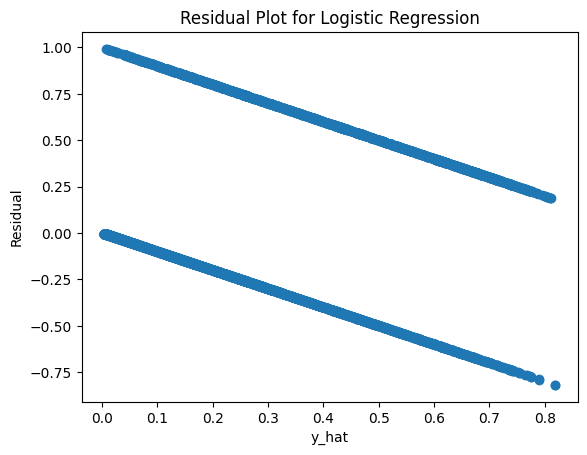

In [10]:
# same residual-predicted value plot from linearity
plt.scatter(pred_prob, residual)
plt.xlabel('y_hat')
plt.ylabel('Residual')
plt.title('Residual Plot for Logistic Regression')
plt.show()

In [11]:
# Breusch-Pagan test generated from Perplexity 9/11/2025 8:30pm
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

model = sm.Logit(y, sm.add_constant(X)).fit()
residuals = model.resid_pearson

exog = model.model.exog

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(residuals, exog)
result = lzip(names, test)
print(result)

Optimization terminated successfully.
         Current function value: 0.453372
         Iterations 7
[('Lagrange multiplier statistic', np.float64(8.89035558314036)), ('p-value', np.float64(0.030784753571954527)), ('f-value', np.float64(2.965515381921001)), ('f p-value', np.float64(0.03076805192824074))]


### Homoscedasticity test result:
p-value = 0.03 (< 0.05), so we reject the null hypothesis of homoscedasticity under significant level of 0.05. For future action, since dependent variable is boolean in nature, transforming dependent variable is not applicable. But heteroscedasticity-consistent standard errors should be applied for statistical inferences.

## test4. Normality of Residuals (for linear regression and GAM)


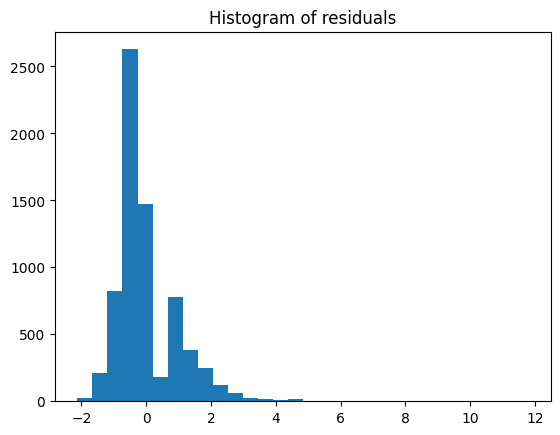

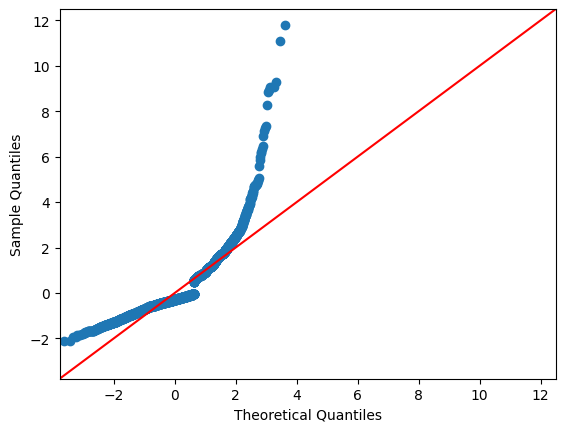

Shapiro-Wilk p-value: 1.0866557568817883e-68


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7032.
  res = hypotest_fun_out(*samples, **kwds)


In [12]:
# residual histogram, Q-Q plot and Shapiro-Wilk test generated by Perplexity 9/11/2025 8:45pm
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

residuals = model.resid_pearson

plt.hist(residuals, bins=30)
plt.title("Histogram of residuals")
plt.show()

sm.qqplot(residuals, line='45')
plt.show()

shapiro_stat, shapiro_p = stats.shapiro(residuals)
print('Shapiro-Wilk p-value:', shapiro_p)

## Normality of residuals result
1. From histogram of residuals, the distribution has long tail on the right indicating that there are some extremely large residuals. Also, the plot is skewed and does does not fit the bell curve. The positive values near zero are of low frequency.        

2. From Q-Q plot the sample quantiles does not align with theoretical quantiles indicating the residual does not strictly follows standard normal distribution.  

3. From Shapiro-Wilk test, the p-value is 1.0866557568817883e-68 which is significantly smaller than 0.05, meaning the null hypothesis of residual normality is rejected under the significant level of 0.05.   

4. All the results indicate that the residual does not follow standard normal distribution. But since the dependent variable is boolean, transformation of dependent variable is not applicable.

## test5. Multicollinearity  
Correlation metric is used to check multicollinearity.

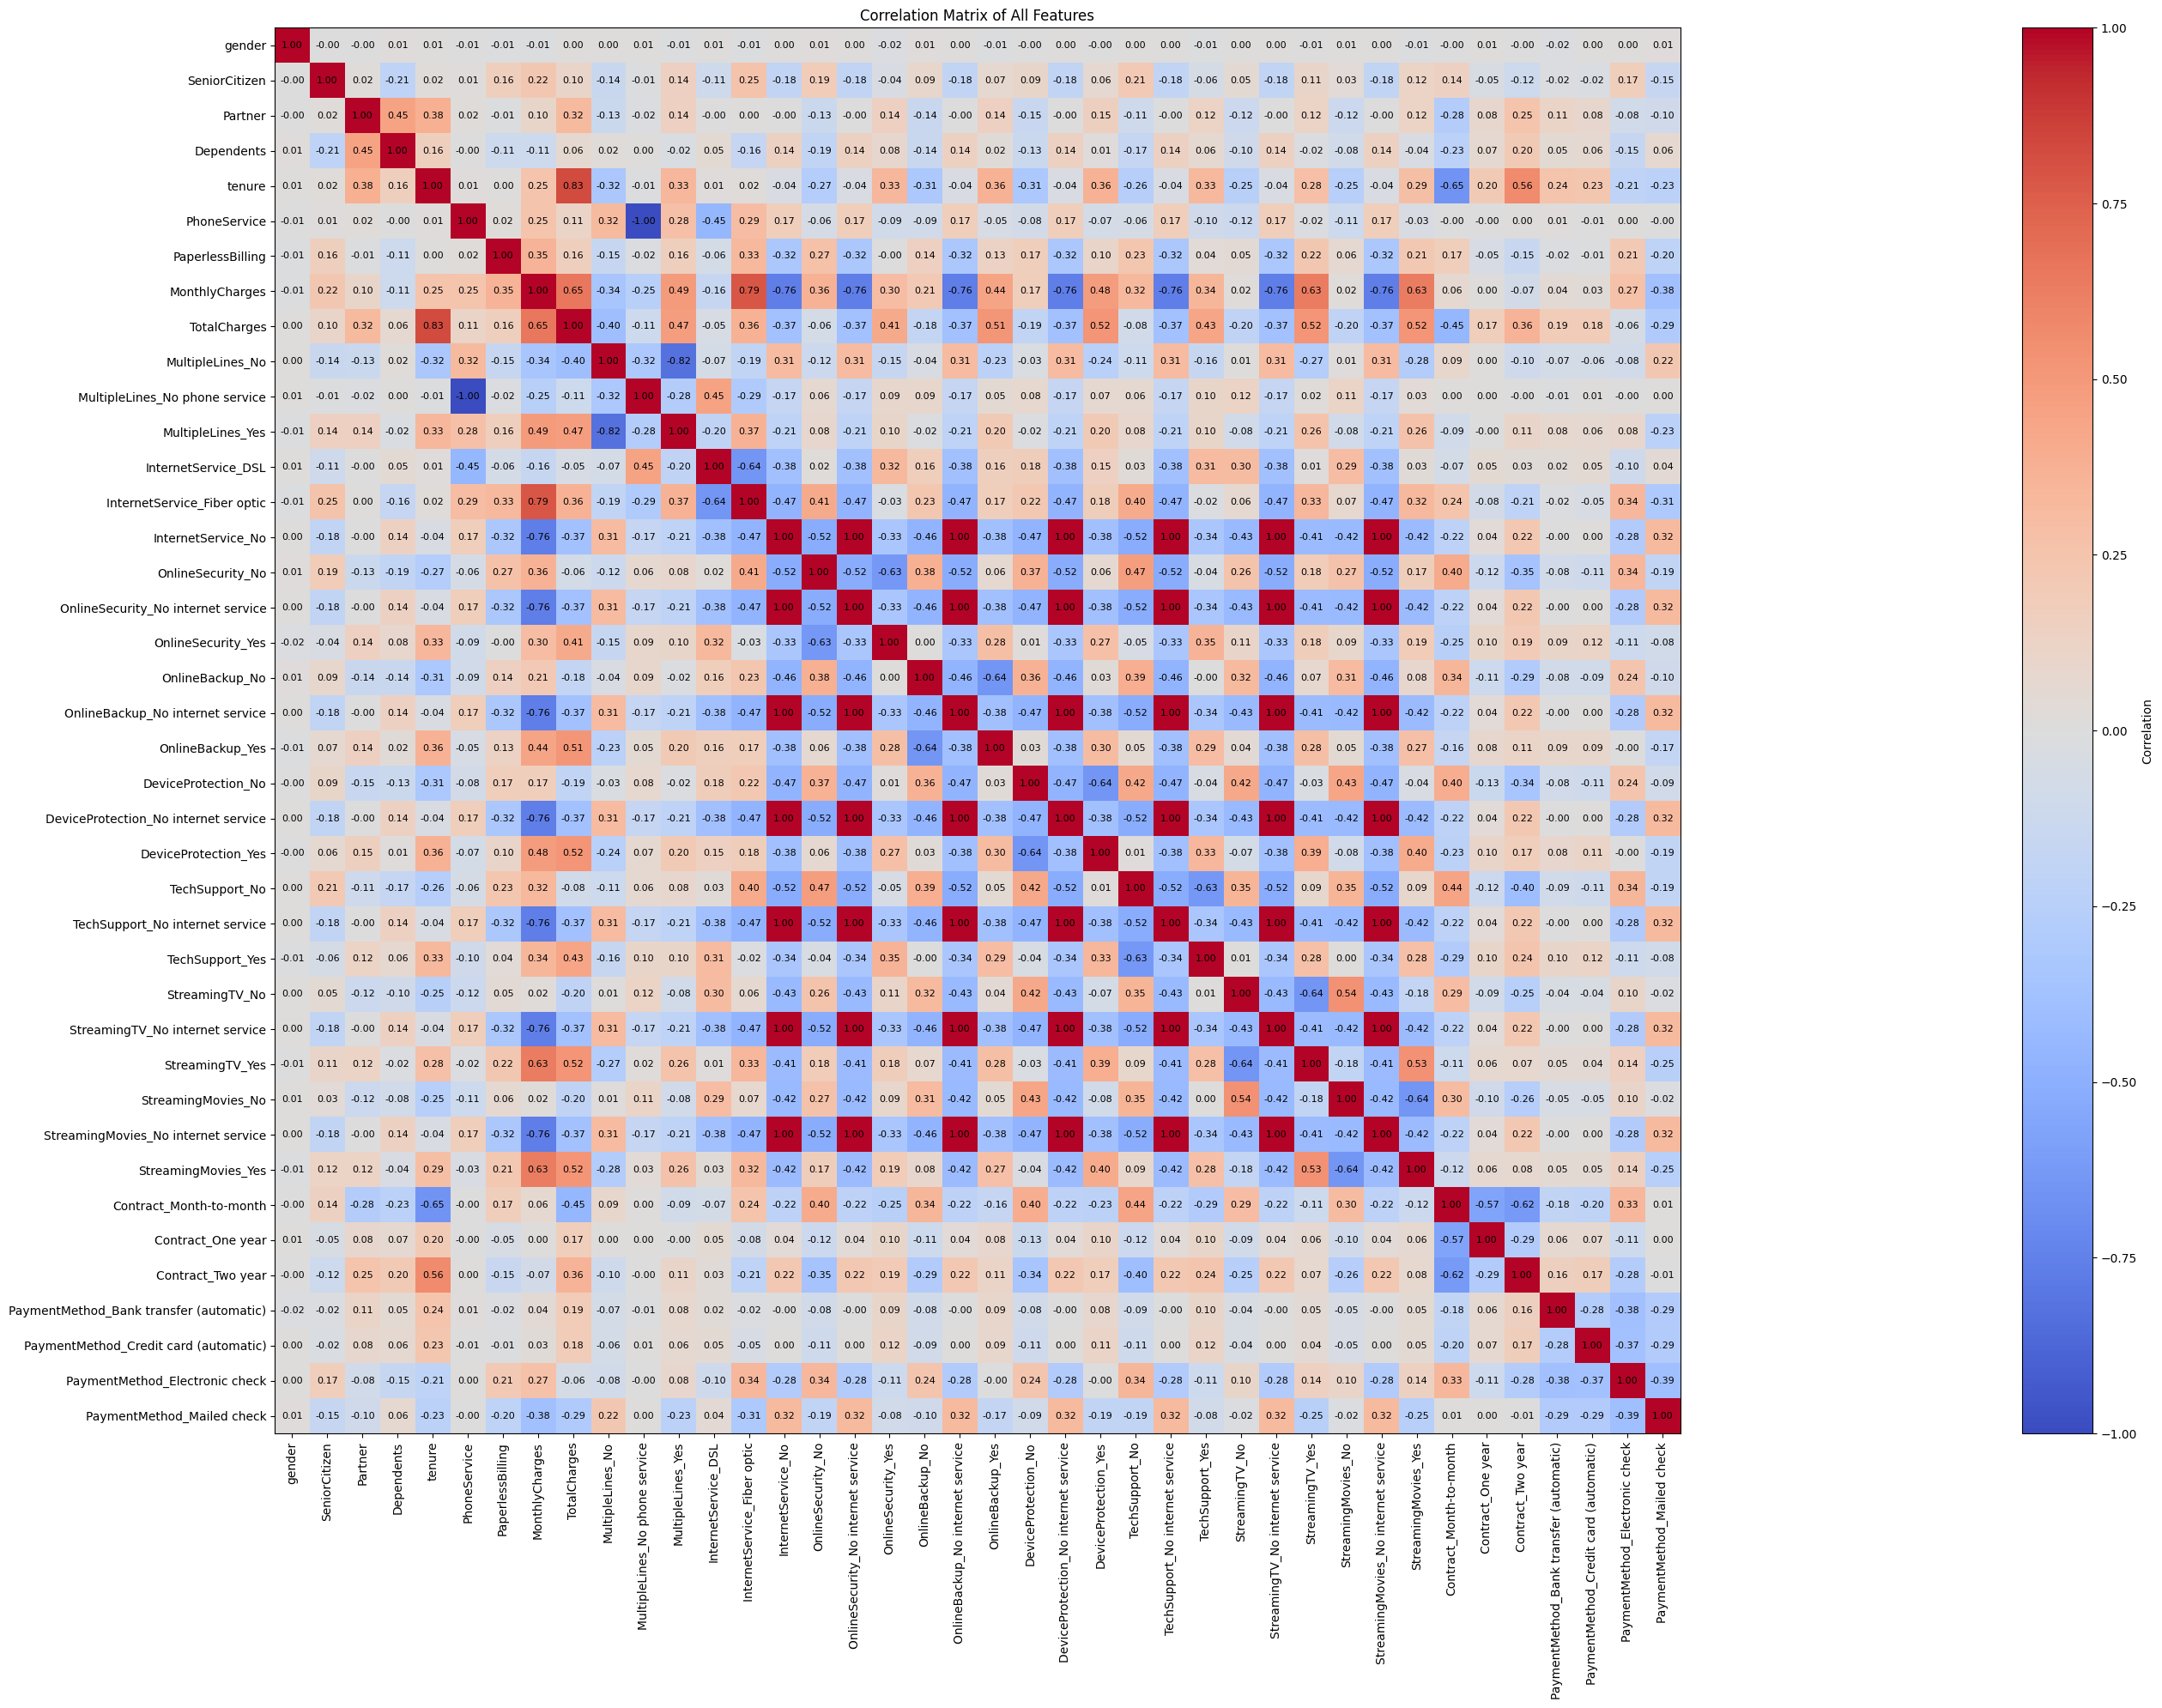

In [13]:
import matplotlib.pyplot as plt
import numpy as np

X = df.drop(columns=['customerID','Churn']) # drop target
corr = X.corr(numeric_only=False)

# plot code generated by Perplexity 9/10/2025 11pm
plt.figure(figsize=(80, 20))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of All Features')
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.index)), corr.index)
for i in range(len(corr.columns)):
    for j in range(len(corr.index)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='black', fontsize=8)
plt.tight_layout()
plt.show()

## Multicollinearity Summary:
1. Systematic high correlation case (corr=1 or -1): No internet service has high correlation with one-hot features related to no internet service. "PhoneService" vs "MultipleLines_No phone service";  Those features should be reduced to one.

2. Other features with high correlation(absolute correlation coeffecient >=0.7): tenure vs TotalCharges*(0.83);
MonthlyCharges vs InternetService_Fiber optic(0.79) & InternetService_No(-0.76);

3. Actions: for features with corr=1 or -1, I will delete some of the features to eliminate the duplicate features(see below) since some are describing the same feature in nature. For other features with high correlation, LASSO will be used in model training to mitigate this issue.

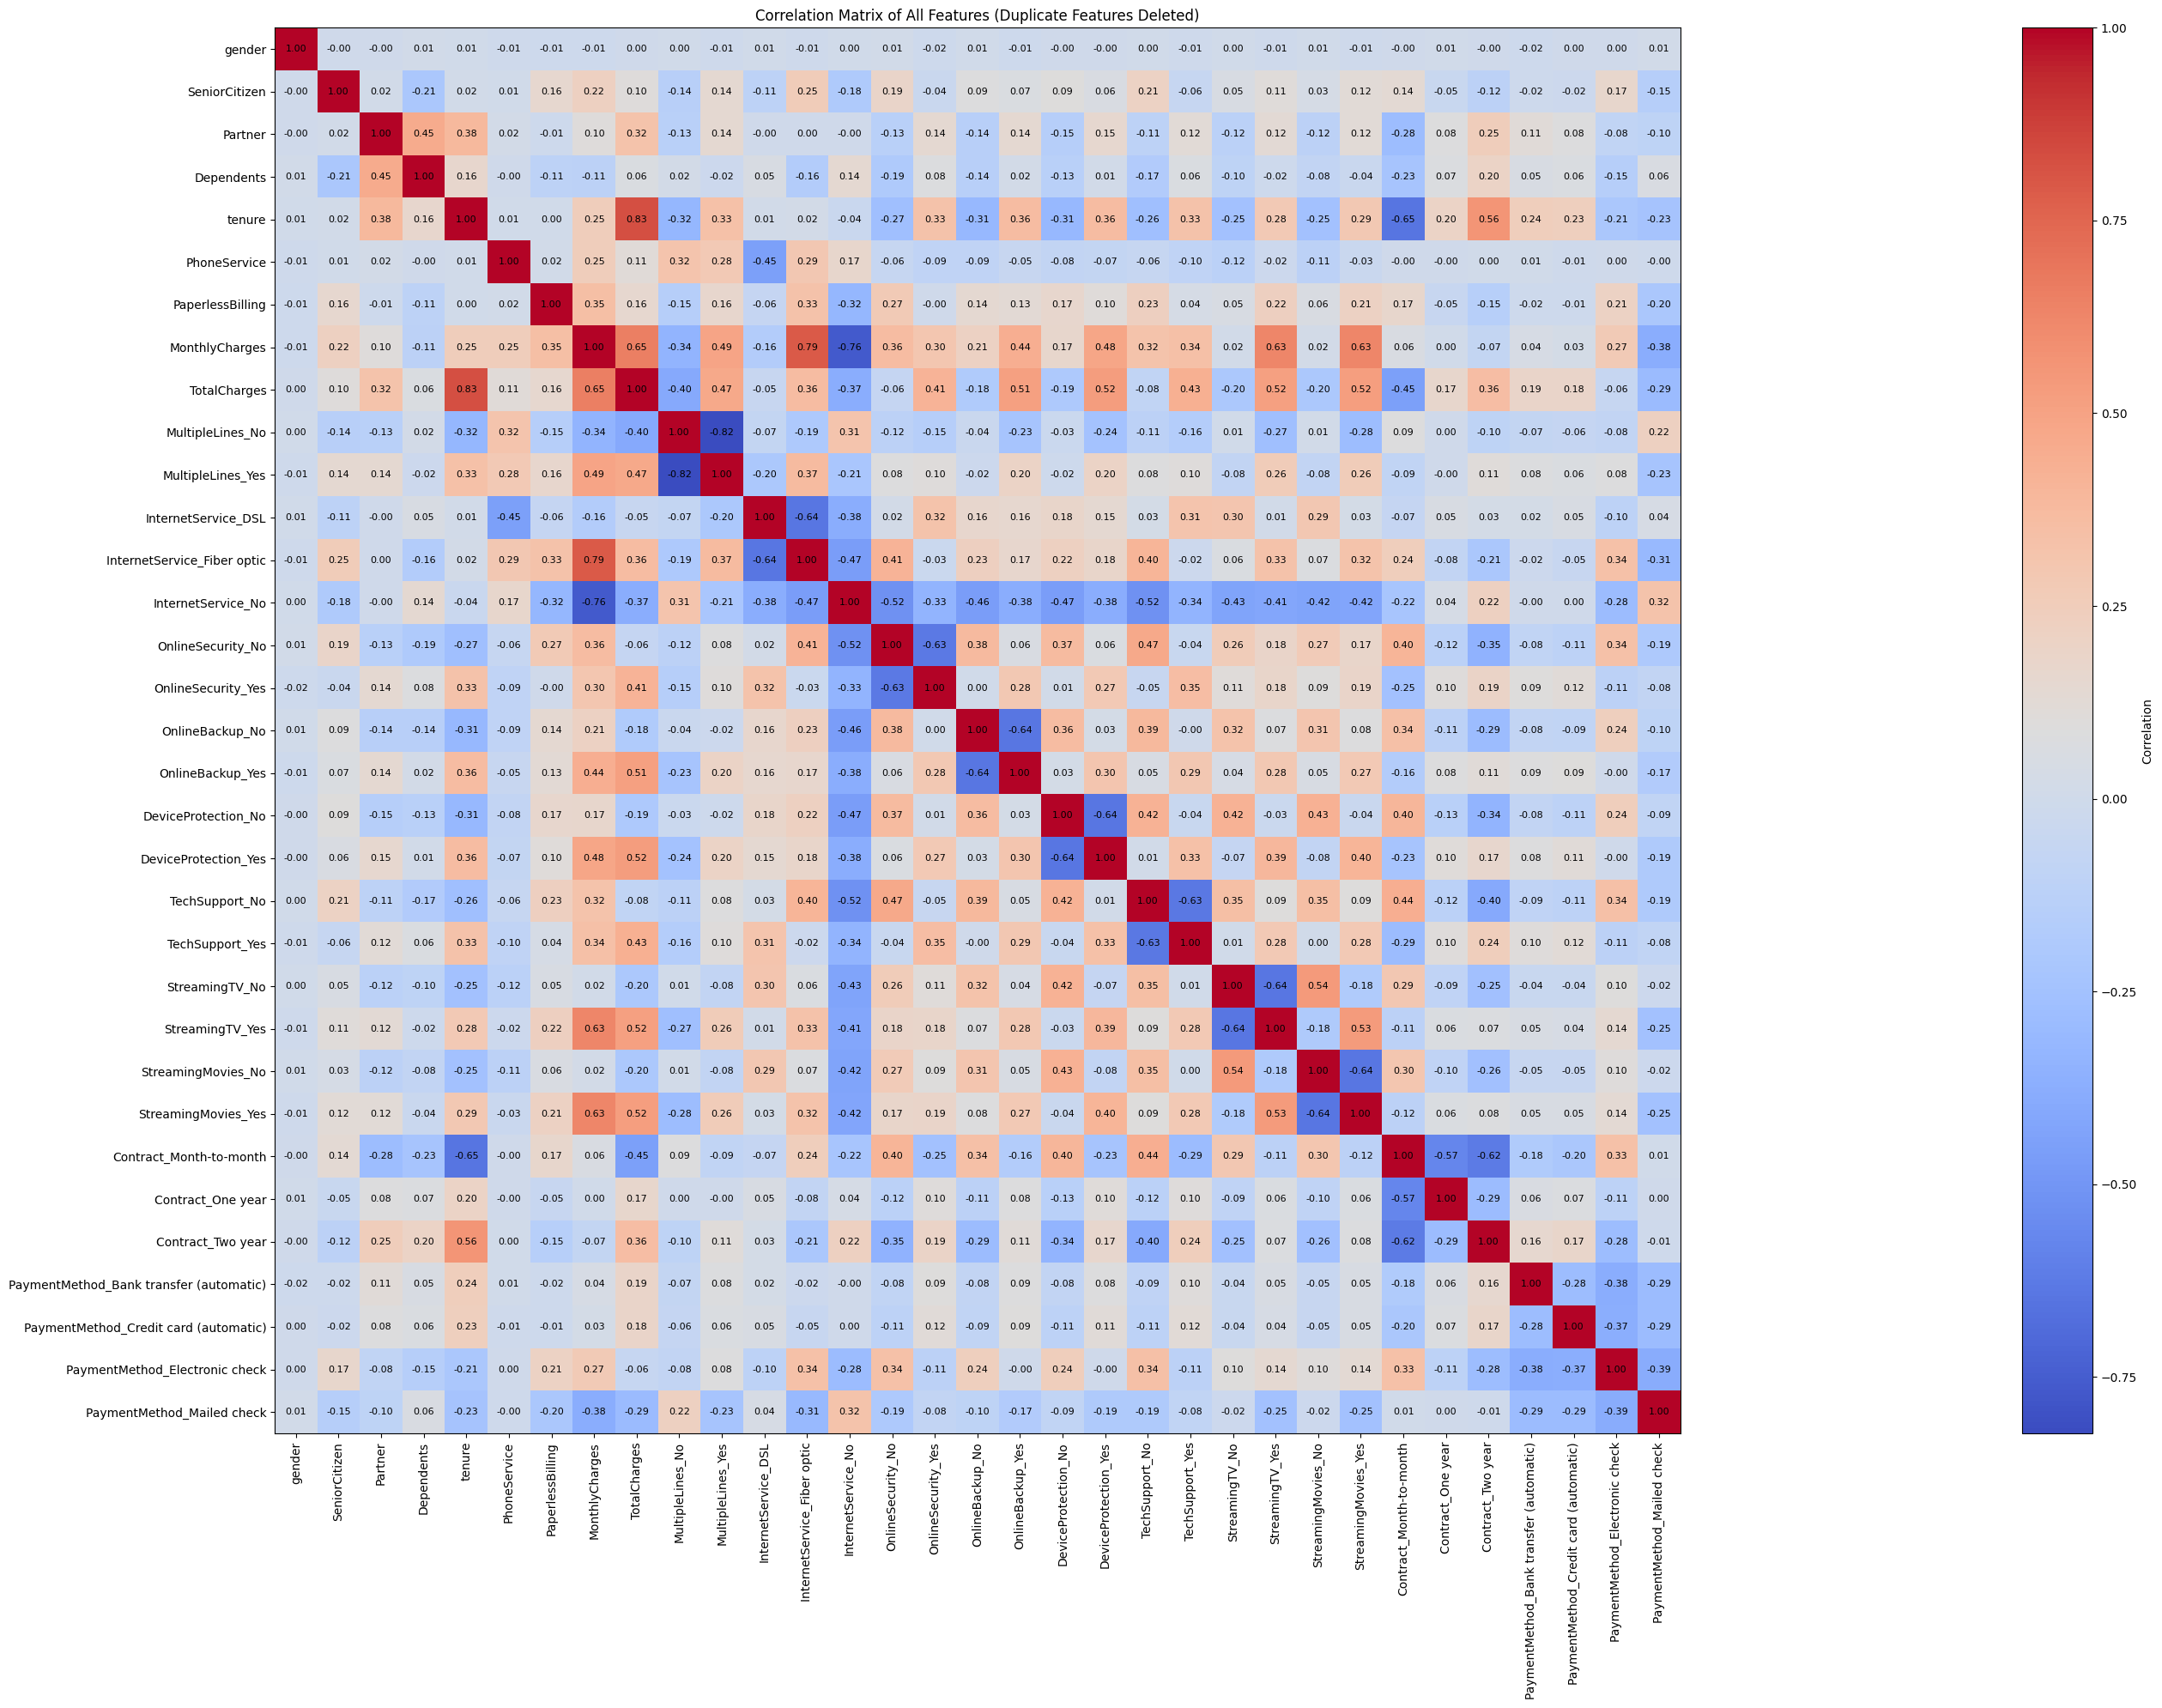

In [14]:
X = df.drop(columns=[
  'customerID',
  'Churn',
  'MultipleLines_No phone service',
  'OnlineSecurity_No internet service',
  'OnlineBackup_No internet service',
  'DeviceProtection_No internet service',
  'TechSupport_No internet service',
  'StreamingTV_No internet service',
  'StreamingMovies_No internet service'])

corr = X.corr(numeric_only=False)
# same plot code from above
plt.figure(figsize=(80, 20))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of All Features (Duplicate Features Deleted)')
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.index)), corr.index)
for i in range(len(corr.columns)):
    for j in range(len(corr.index)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='black', fontsize=8)
plt.tight_layout()
plt.show()

## test6. Influential Outliers
Cook's distance is applied.

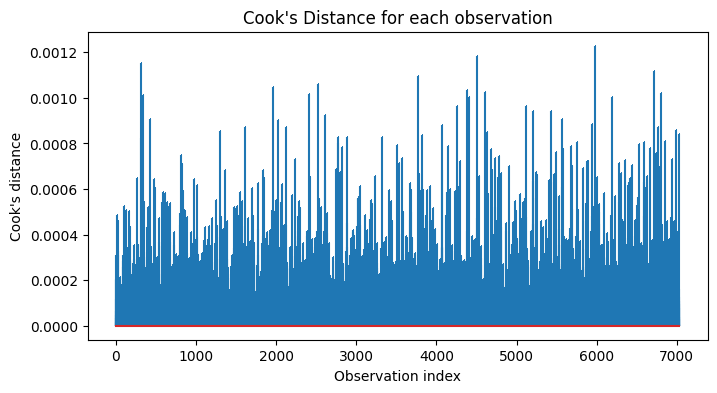

Influential points: [ 268  317  320  335  430  481  494  594  608  610  809  826  828  840
  972 1012 1302 1360 1550 1607 1696 1775 1835 1851 1962 2024 2069 2122
 2199 2239 2407 2419 2524 2605 2609 2747 2770 2775 2799 2817 2889 3035
 3053 3235 3321 3409 3511 3528 3571 3666 3688 3773 3782 3784 3793 3827
 3837 3883 3917 4071 4075 4133 4142 4167 4234 4259 4265 4280 4289 4378
 4394 4410 4505 4531 4602 4634 4645 4676 4690 4726 4765 4787 4811 4902
 5042 5119 5202 5208 5249 5261 5405 5432 5466 5473 5488 5495 5535 5570
 5572 5580 5675 5693 5756 5832 5875 5891 5937 5983 6007 6096 6193 6280
 6303 6348 6389 6399 6415 6435 6528 6584 6596 6599 6623 6670 6714 6746
 6761 6774 6781 6789 6802 6858 6934 6985 7023]
Total points: 135
Cook's D values for these points: [0.00064802 0.00082331 0.001152   0.00101416 0.00090598 0.00064373
 0.00060573 0.00058742 0.00057032 0.00058108 0.00074728 0.00071095
 0.00057901 0.00058939 0.00064321 0.00061858 0.00085493 0.0006848
 0.00058851 0.00087054 0.00060593 0.000626

In [15]:
# Cook's distance below: generated by Perplexity 9/14/2025 8:29 pm
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

X = X.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
model = sm.OLS(y, X).fit()
influence = model.get_influence()
cooks_d, pvals = influence.cooks_distance

plt.figure(figsize=(8, 4))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel("Observation index")
plt.ylabel("Cook's distance")
plt.title("Cook's Distance for each observation")
plt.show()

n = len(y)
threshold = 4/n  # D>1 (small sample) or D>4/n (large sample)
outlier_indices = np.where(cooks_d > threshold)[0]
print("Influential points:", outlier_indices)
print("Total points:", len(outlier_indices))
print("Cook's D values for these points:", cooks_d[outlier_indices])

### Outlier results:
There are 135 outliers identified using Cook's Distance, which aligns with the previous histogram of long tails indicating extreme values (outliers). The action for next step is to remove those data points.

In [16]:
# generated by Perplexity 9/14/2025 8:48pm
mask = np.ones(len(X), dtype=bool)
mask[outlier_indices] = False

X = X.iloc[mask]
y = y[mask] # np array
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


In [17]:
y

array([False, False,  True, ..., False,  True, False])

In [18]:
# apply standard scaler to X
from sklearn.preprocessing import StandardScaler
num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X[num_var] = scaler.fit_transform(X[num_var])
X.head()

/tmp/ipython-input-3633974110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_var] = scaler.fit_transform(X[num_var])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.266500,0,1,-1.154543,-0.985690,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0.079268,1,0,-0.253649,-0.158967,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.225719,1,1,-0.356703,-0.950881,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0.527857,0,0,-0.740664,-0.180639,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.225719,1,1,0.203446,-0.931543,1,...,0,1,0,1,0,0,0,0,1,0


# 2. Linear Regression
Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.

In [19]:
from sklearn.linear_model import ElasticNet # due to multi-collinearity
from sklearn.metrics import mean_squared_error, r2_score

y_lr= y.astype(int) # treat bool target variable as int (0/1)

# grid search for best l1_ratio
for alpha in [0.01,0.1,0.5,1,2]:
  print(f"alpha {alpha}")
  for l1_ratio in [0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=1000)
    model.fit(X, y_lr)
    y_pred = model.predict(X)
    mse = mean_squared_error(y_lr, y_pred)
    r2 = r2_score(y_lr, y_pred)
    print(f"l1_ratio: {l1_ratio}, MSE: {mse}, R2: {r2}")


alpha 0.01


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.350e+02, tolerance: 1.298e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


l1_ratio: 0, MSE: 0.12560204572114636, R2: 0.3326311269333305
l1_ratio: 0.01, MSE: 0.12560735407999563, R2: 0.3326029217122871
l1_ratio: 0.1, MSE: 0.12569041862667832, R2: 0.3321615698808488
l1_ratio: 0.2, MSE: 0.1258537944235609, R2: 0.33129349547309617
l1_ratio: 0.3, MSE: 0.12607363821489936, R2: 0.33012538628797994
l1_ratio: 0.4, MSE: 0.12636566696768606, R2: 0.32857373242333676
l1_ratio: 0.5, MSE: 0.12673595241652916, R2: 0.32660627256797703
l1_ratio: 0.6, MSE: 0.12718032942560362, R2: 0.324245137587571
l1_ratio: 0.7, MSE: 0.12760920426291802, R2: 0.32196637122495453
l1_ratio: 0.8, MSE: 0.12799033246876707, R2: 0.3199412998993162
l1_ratio: 0.9, MSE: 0.12841631117824737, R2: 0.31767792170619824
l1_ratio: 1, MSE: 0.12885951416494498, R2: 0.3153230247292107
alpha 0.1


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.490e+02, tolerance: 1.298e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


l1_ratio: 0, MSE: 0.12624727048152737, R2: 0.3292028155651685
l1_ratio: 0.01, MSE: 0.12646319714685642, R2: 0.3280555194803133
l1_ratio: 0.1, MSE: 0.12994723134448175, R2: 0.30954359188514446
l1_ratio: 0.2, MSE: 0.13447304634235382, R2: 0.28549630796157044
l1_ratio: 0.3, MSE: 0.139206994405436, R2: 0.2603431381554884
l1_ratio: 0.4, MSE: 0.14471073408164867, R2: 0.23109978846100176
l1_ratio: 0.5, MSE: 0.15020199642696777, R2: 0.20192273531614158
l1_ratio: 0.6, MSE: 0.1537004060958026, R2: 0.1833344256687075
l1_ratio: 0.7, MSE: 0.15684332331089892, R2: 0.16663497536964644
l1_ratio: 0.8, MSE: 0.1604928881508019, R2: 0.14724352389761264
l1_ratio: 0.9, MSE: 0.16468572683184973, R2: 0.12496546298343336
l1_ratio: 1, MSE: 0.16904380656164836, R2: 0.10180941690702183
alpha 0.5


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.891e+02, tolerance: 1.298e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


l1_ratio: 0, MSE: 0.13072509178983024, R2: 0.30541053938719476
l1_ratio: 0.01, MSE: 0.13279775651687273, R2: 0.29439772574081235
l1_ratio: 0.1, MSE: 0.1555649202654829, R2: 0.17342759084693282
l1_ratio: 0.2, MSE: 0.17349637963315062, R2: 0.07815129369800478
l1_ratio: 0.3, MSE: 0.1831879243233681, R2: 0.02665662877395436
l1_ratio: 0.4, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.5, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.6, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.7, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.8, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.9, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 1, MSE: 0.1882048306268531, R2: 0.0
alpha 1


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.195e+02, tolerance: 1.298e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


l1_ratio: 0, MSE: 0.1365493672636181, R2: 0.2744640676394242
l1_ratio: 0.01, MSE: 0.141425047155487, R2: 0.2485578256177423
l1_ratio: 0.1, MSE: 0.17687159273191624, R2: 0.060217571765768474
l1_ratio: 0.2, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.3, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.4, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.5, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.6, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.7, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.8, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.9, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 1, MSE: 0.1882048306268531, R2: 0.0
alpha 2
l1_ratio: 0, MSE: 0.146088922040709, R2: 0.22377697982495348
l1_ratio: 0.01, MSE: 0.1553521521697192, R2: 0.17455810431491903
l1_ratio: 0.1, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.2, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.3, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.4, MSE: 0.1882048306268531, R2: 0.0
l1_ratio: 0.5, MSE: 0.1882048306268531, R2: 0.0
l1_rat

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.545e+02, tolerance: 1.298e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### Analysis
For linear regression, pure Ridge regularization (l1_ratio=0) performs the best in all alphas. And the smaller the alpha, the smaller the MSE and the bigger the R2. This indicate the pure linear regression without regularization perform the best.

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y_lr)
y_pred = model.predict(X)
mse = mean_squared_error(y_lr, y_pred)
r2 = r2_score(y_lr, y_pred)
print(f"MSE: {mse}, R2: {r2}")

y_pred_bool = y_pred > 0.5
accuracy = (y_pred_bool == y_lr).mean()
print(f"accuracy: {accuracy}")
precision = ((y_pred_bool == True) & (y_lr == True)).sum() / (y_pred_bool == True).sum()
print(f"precision: {precision}")
recall = ((y_pred_bool == True) & (y_lr == True)).sum() / (y_lr == True).sum()
print(f"recall: {recall}")
f1 = 2 * precision * recall / (precision + recall)
print(f"f1: {f1}")

MSE: 0.12557942680991943, R2: 0.3327513093492206
accuracy: 0.8194867333623315
precision: 0.6713384723195515
recall: 0.552479815455594
f1: 0.6061372983233153


The pure linear regression validates the analysis above.

In [21]:
print("Feature Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef}")

print(f"Intercept: {model.intercept_}")

Feature Coefficients:
gender: -0.00678089790773473
SeniorCitizen: 0.045320217335815094
Partner: 0.0028424676048933242
Dependents: -0.02263702700551069
tenure: -0.05207815174834499
PhoneService: 0.008398995905447647
PaperlessBilling: 0.05043480782862398
MonthlyCharges: -0.014076652438272039
TotalCharges: -0.10877171885854275
MultipleLines_No: -0.024374056628093773
MultipleLines_Yes: 0.03277305253354164
InternetService_DSL: -0.07116668278812527
InternetService_Fiber optic: 0.12499270056556742
InternetService_No: -0.053826017777442184
OnlineSecurity_No: 0.053848606961691727
OnlineSecurity_Yes: -2.2589184249081876e-05
OnlineBackup_No: 0.038076048247806235
OnlineBackup_Yes: 0.015749969529636046
DeviceProtection_No: 0.02482964915102954
DeviceProtection_Yes: 0.028996368626412673
TechSupport_No: 0.056192421720498605
TechSupport_Yes: -0.0023664039430562854
StreamingTV_No: -0.0017317072187769144
StreamingTV_Yes: 0.05555772499621948
StreamingMovies_No: 0.0012374139655343898
StreamingMovies_Yes: 0

### Conclusion:
1. Performance: The linear model performs best without L1 or L2 regularization. Best MSE (mean squared error) which measures the overall error is 0.12557942680991943 and best R2 is 0.3327513093492206, meaning that around 33.3% of the variance is explained by the model. Since the R^2 is way smaller than 0.8, the performance is not good.

2. Model coefficience interpretation: for numerical features('tenure', 'MonthlyCharges', 'TotalCharges'), unit change in the feature will result in coefficient change in the prediction of target variable (churn); for boolean features(all other), having such feature (value=1 or Ture) will result in coefficient change in the prediction of target variable (churn). And for intercept, it is the expected value for target variable when all predicting variables are 0 or False.

# 3. Logistic Regression
Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for C in [0.01,0.1,0.5,1,2,3]:
  print(f"C {C}")
  for l1_ratio in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=l1_ratio, C=C, max_iter=1000)
    model.fit(X, y)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    pre = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f"l1_ratio {l1_ratio}, acc {acc:.4f}, pre {pre:.4f}, rec {rec:.4f}, f1 {f1:.4f}")


C 0.01
l1_ratio 0, acc 0.8214, pre 0.6785, rec 0.5502, f1 0.6076
l1_ratio 0.1, acc 0.8182, pre 0.6734, rec 0.5375, f1 0.5978
l1_ratio 0.2, acc 0.8167, pre 0.6736, rec 0.5260, f1 0.5907
l1_ratio 0.3, acc 0.8166, pre 0.6746, rec 0.5225, f1 0.5889
l1_ratio 0.4, acc 0.8164, pre 0.6765, rec 0.5173, f1 0.5863
l1_ratio 0.5, acc 0.8162, pre 0.6781, rec 0.5115, f1 0.5832
l1_ratio 0.6, acc 0.8159, pre 0.6798, rec 0.5058, f1 0.5800
l1_ratio 0.7, acc 0.8146, pre 0.6790, rec 0.4977, f1 0.5744
l1_ratio 0.8, acc 0.8141, pre 0.6799, rec 0.4925, f1 0.5712
l1_ratio 0.9, acc 0.8131, pre 0.6787, rec 0.4873, f1 0.5673
l1_ratio 1, acc 0.8114, pre 0.6773, rec 0.4769, f1 0.5597
C 0.1
l1_ratio 0, acc 0.8211, pre 0.6632, rec 0.5859, f1 0.6222
l1_ratio 0.1, acc 0.8209, pre 0.6632, rec 0.5848, f1 0.6215
l1_ratio 0.2, acc 0.8220, pre 0.6656, rec 0.5865, f1 0.6235
l1_ratio 0.3, acc 0.8222, pre 0.6667, rec 0.5859, f1 0.6237
l1_ratio 0.4, acc 0.8220, pre 0.6660, rec 0.5854, f1 0.6231
l1_ratio 0.5, acc 0.8218, pre 0.6

### Analysis
Best hyperparameter so far: C=3, l1_ratio=0.3 (acc 0.8224, pre 0.6630, rec 0.5969, f1 0.6282). Examine pure Logistic Regression just in case.

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
y_pred = model.predict(X)
acc = accuracy_score(y, y_pred)
pre = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"acc {acc:.4f}, pre {pre:.4f}, rec {rec:.4f}, f1 {f1:.4f}")

acc 0.8220, pre 0.6626, rec 0.5946, f1 0.6267


### Result
1. Performance: best performance is achieved with C=3 and l1_ratio = 0.3. Performance matrix: acc 0.8224, pre 0.6630, rec 0.5969, f1 0.6282.

2. Coefficient interpretation: for numerical features('tenure', 'MonthlyCharges', 'TotalCharges'), unit change in the feature will result in coefficient change in the prediction of log odds of churn; for boolean features(all other), having such feature (value=1 or Ture) will result in coefficient change in the prediction of log odds of churn. And for intercept, it is the expected value for log odds of churn when all predicting variables are 0 or False.

# 4. Generalized Additive Model (GAM)
Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.

In [24]:
!pip install pygam

Accuracy: 0.8159420289855073
Precision: 0.6632302405498282
Recall: 0.5530085959885387
F1: 0.603125


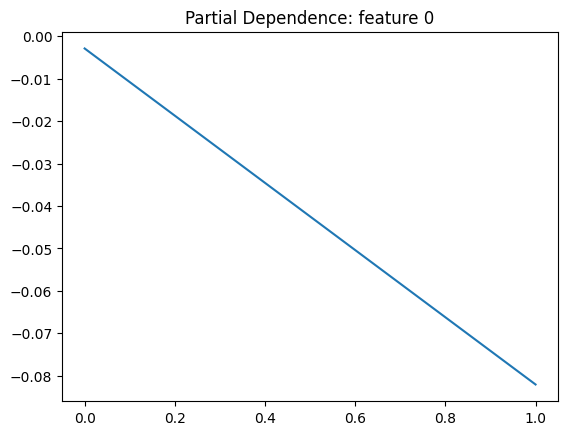

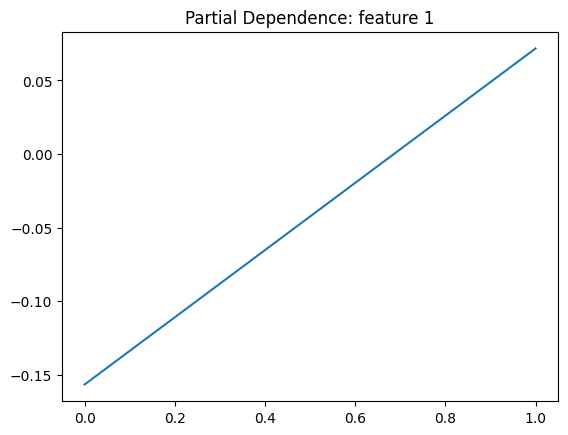

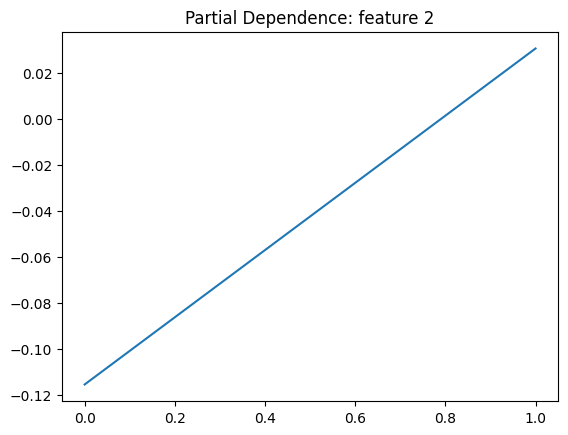

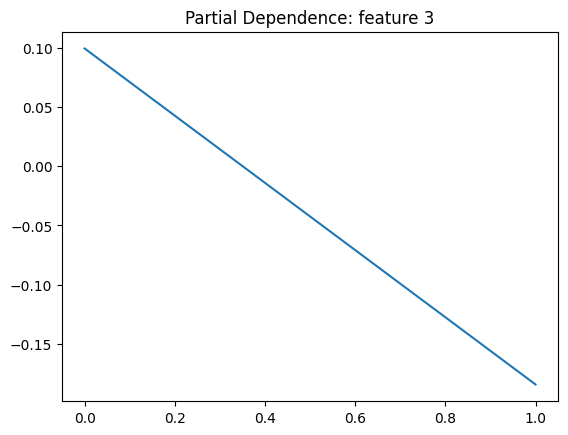

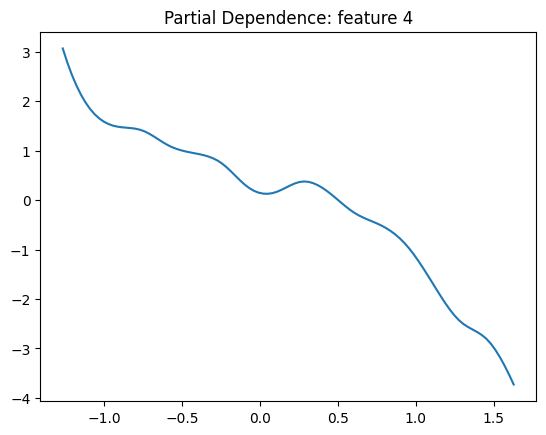

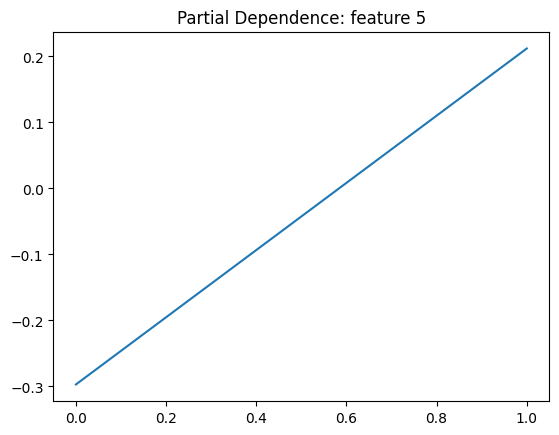

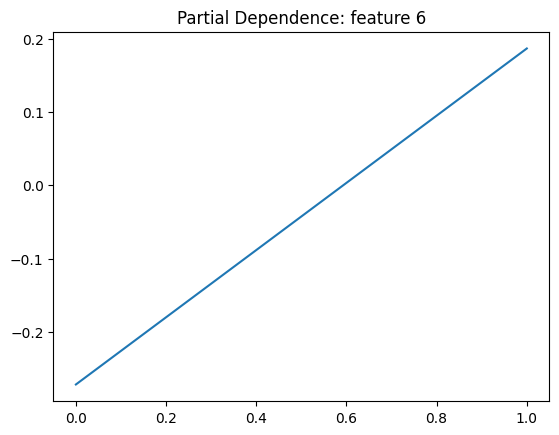

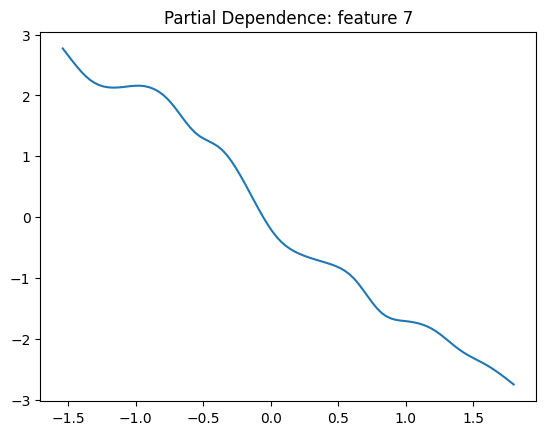

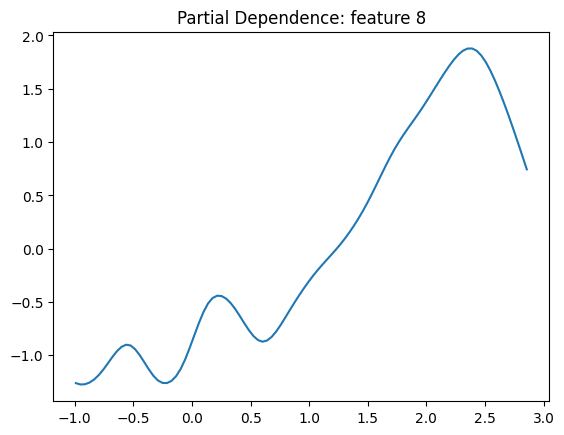

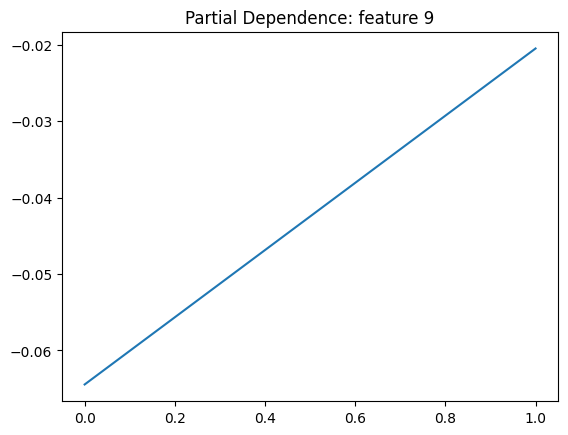

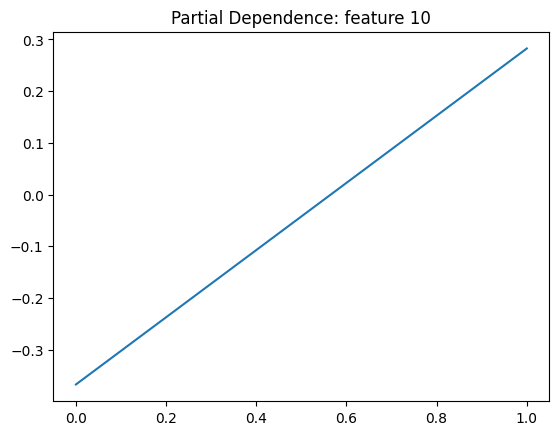

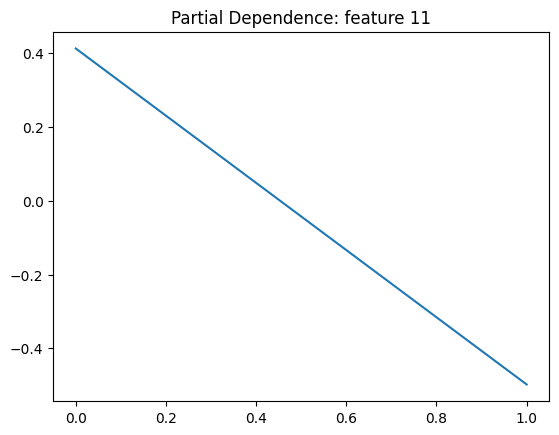

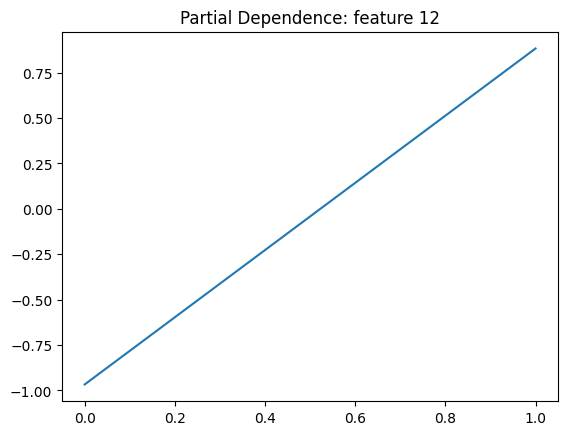

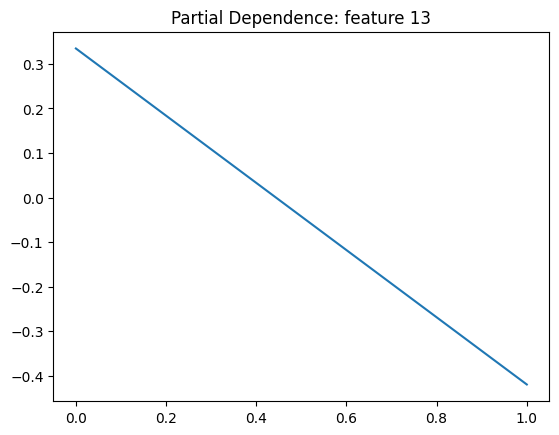

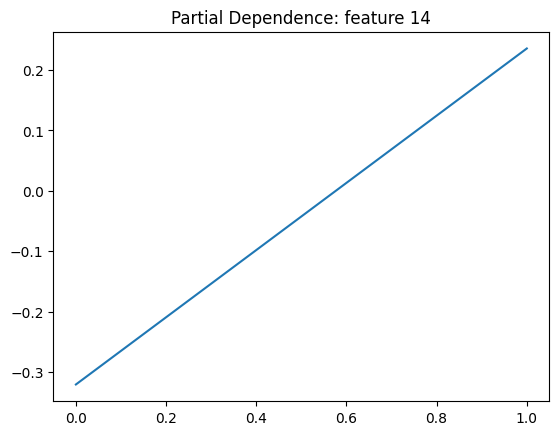

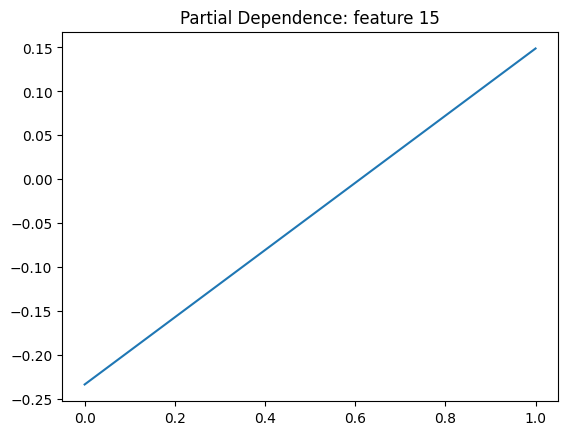

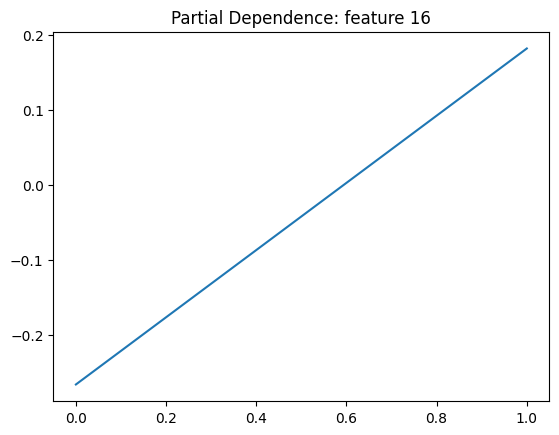

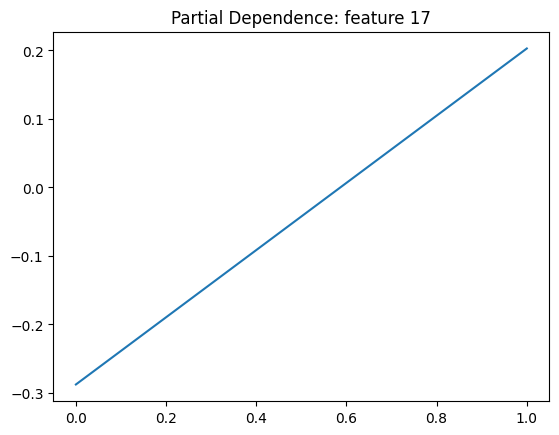

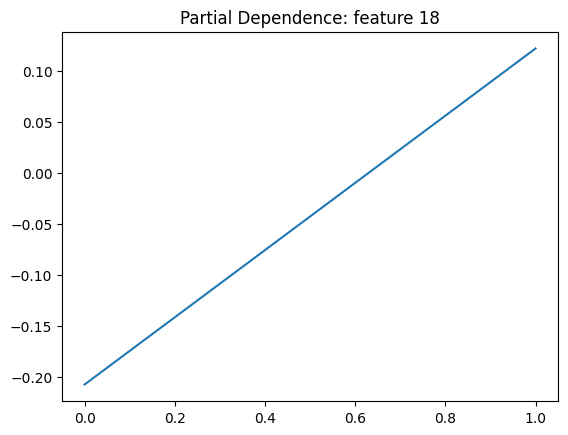

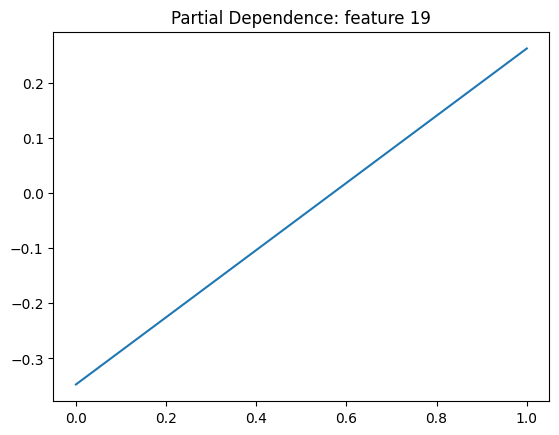

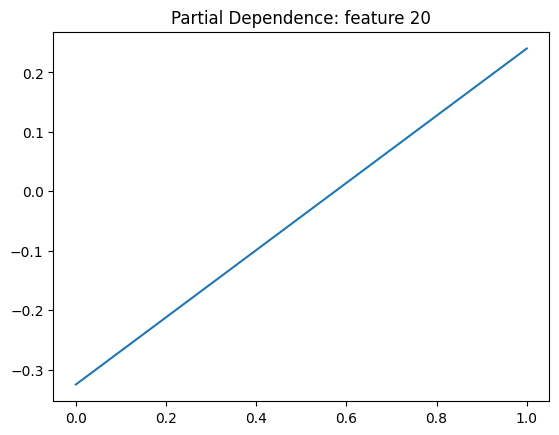

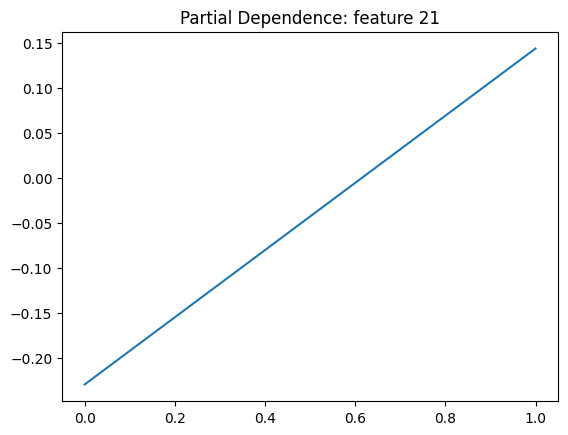

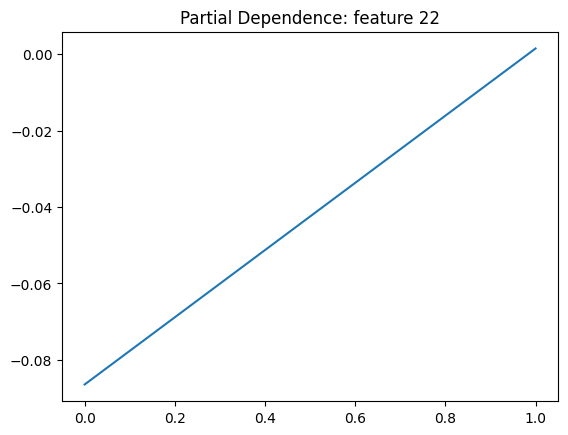

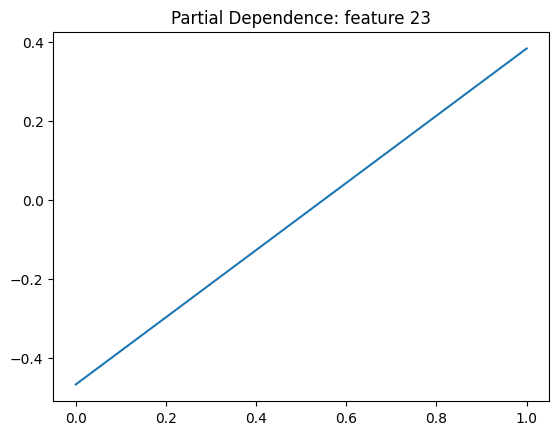

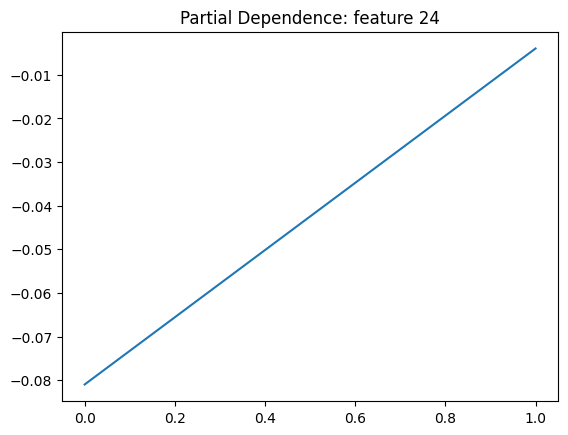

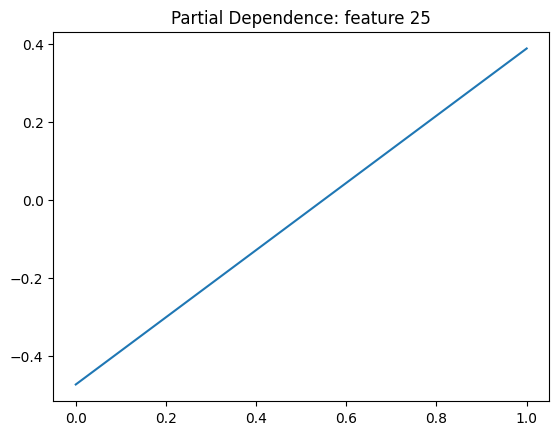

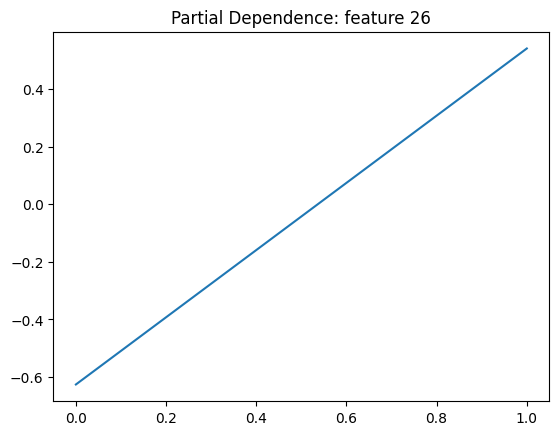

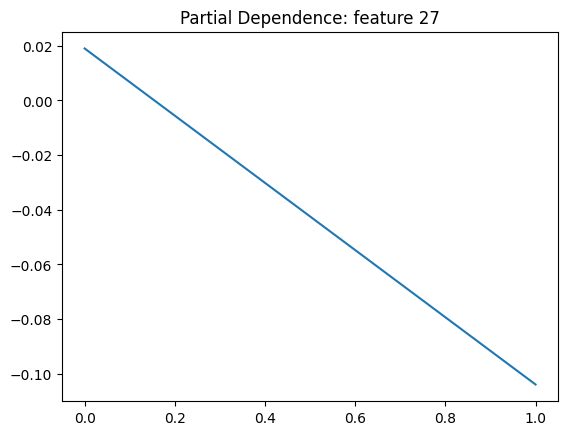

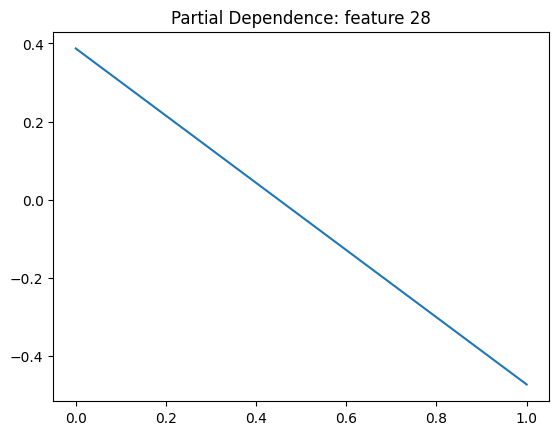

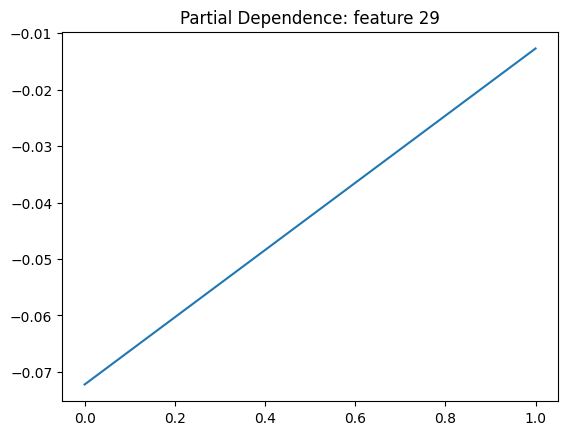

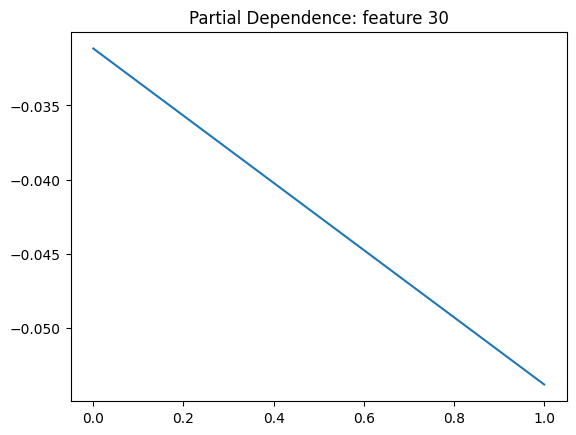

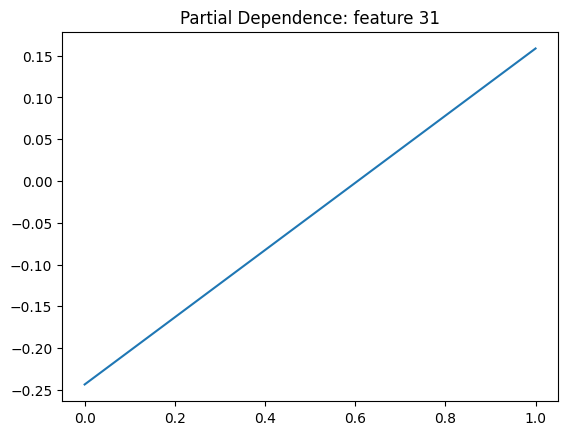

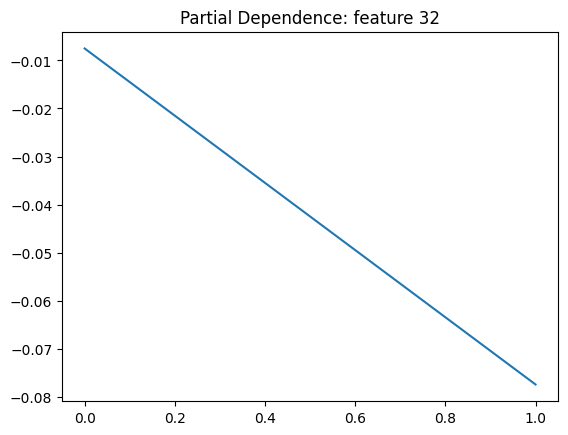

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     54.5607
Link Function:                        LogitLink Log Likelihood:                                 -1925.6513
Number of Samples:                         5517 AIC:                                              3960.424
                                                AICc:                                             3961.575
                                                UBRE:                                               2.7258
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3806
Feature Function                  Lam

In [25]:
# GAM code generated by Perplexity 9/14/2025 22:20
from pygam import LogisticGAM, s
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import warnings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gam = LogisticGAM().fit(X_train, y_train)

y_pred = gam.predict(X_test)
y_proba = gam.predict_proba(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

import matplotlib.pyplot as plt
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f'Partial Dependence: feature {i}')
    plt.show()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gam.summary()

### Interpretation  
1. Partial Dependence Plot:  
For boolean features, the straight lines indicat that the effect for this feature is still boolean since intermidiate values cannot be reached. Positive slope means having this feature will add to the risk of churn compared to not having, with effect being the value of slope. Negative slope means having this feature will reduce the risk of churn compared to having.  
For numeric features, it shows the non-linear tranformation from this feature to its impact to the risk of churn. For example, for feature 4, the overall trend is that as the feature increases, the risk of churn is smaller. But around zero, there is a local minimum, which is a turning points that the company can study and make actions/decisions accordingly. Similar study can be done for feature 7 & 8.

2. GAM Summary Interpretation
This GAM model is for binomial problem and uses logit as link function. This model explains 38.1% of the churn feature, which is not that good. s(4)、s(8)、s(26)、s(28)、s(31) are good features that has high effect on the result. In addition to that, s(4) and s(8) capture non-linearity, which is important for future risk control. Most of the other features transformation are close to linear.

# 5. Model Comparison
Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.

### Conclusion
1. Performance result (best performance in each model category)
- linear regression -- accuracy: 0.8195, precision: 0.6713, recall: 0.5525, f1: 0.6061
- logistic regression -- accuracy: 0.8220, precision: 0.6626, recall: 0.5946, f1: 0.6267
- GAM -- accuracy: 0.8159, precision: 0.6632, recall: 0.5530, f1: 0.6031

2. Analysis  
- Based on performance, logistic regression has the highest accuracy, recall and F-1 score, which performs the best for identifying the customer who churns.  
- As for interpretability, linear regression model itself is easy to interpret but the prediction is directly related to the probability so not appropriate for this binary classification task. Logistic regression have best interpretability since the coefficient for each feature is directly relatated to the odds/probability of churning, although it cannot automatically deal with non-linear relationships. And GAM has relatively low interpretability compared to the other two models; but it can deal with non-linear relationships in the features. However, since most of the features are boolean (only three numerical), the non-linearity potential is not enough. Also, generally speaking, GAM also faces the overfitting problem which could lead to low score on test set.

3. Final Recommendation  
Combined the performance and the model pros and cons, logistic regression is my promary recommendation since it performs the best and it is high explainable in this case of binary classification task of churning.